# Homework 5 (DL Friday, October 27 at 12:00 PM)
#### ELEC-E8740 - Basics of sensor fusion - Autumn 2023


In [21]:
import numpy as np
import matplotlib.pyplot as plt

## Question:

## Implement Gauss–Newton with line search for minimizing the cost function $J(x) = (1.1 − \sin(x))^2$. Use grid search with grid $\gamma \in [0,\frac{1}{10}, \frac{2}{10}, \ldots , 1]$. Hint: Beware of the singularity of the derivative at the minimum.

## Recall:
#### Check "Gauss–Newton Algorithm with Line Search" in page $15$ of houndout $5$. Here, we want to use the "Exact Line Search on Grid" method as in page $11$ of houndout $5$.
## Procedure:
####  First, you need to define measurement function $g(x)$, its Jacobian $G(x)$, and the cost function $J(x)$.
#### Consider the function $g(x)$ in this example as $g(x) = \sin(x)$ and the measurement as $y = 1.1$.

In [22]:
def g(x):
    return np.sin(x)

y = 1.1

### Part a (1 point): In the section below, implement the code for the Jacobian, $G(x)$, and the cost function, $J(x)$. 

In [28]:
def G(x):
    """ 
    Implement the Jacobian of g(x).
    """
    # YOUR CODE HERE
    return np.cos(x)
    # raise NotImplementedError()
    
def J(x):
    """
    Implement the cost function.
    """
    # YOUR CODE HERE
    return (1.1 - np.sin(x))**2
    raise NotImplementedError()

In [29]:
"""Check the result for several inputs"""
assert np.allclose(G(0.0), 1.0)
assert np.allclose(J(0.0), 1.21)

#### Before implementing Gauss-Newton with line search method, let's visually observe the minimums of the cost function $J(x)$, and the cost of an initial guess e.g. $x_0 = 3.3$. 


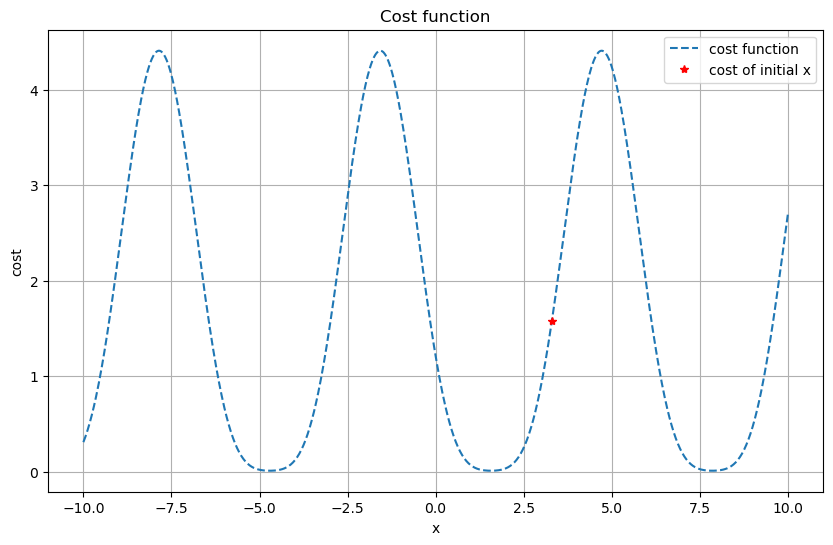

In [24]:
x0 = 3.3 # initial guess
xs = np.linspace(-10, 10, 1000)
cost_results = [J(x) for x in xs]

plt.figure(figsize=(10,6))
plt.plot(xs, cost_results, linestyle='--', label='cost function')
plt.plot(x0, J(x0), 'r*', label='cost of initial x')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('Cost function')
plt.show()

### Part b (1 point): Here we aim to implemet the "Exact Line Search on Grid" algorithm according to the Page $11$ of houndout $5$ (Alg.3).


In [34]:
def Exact_LS_on_Grid(xi, del_x, Ng):
    '''
    Input:
        xi: result of the previous iteration
        del_x: the update direction
        Ng: the grid size
    Output:
        opt_gamma: optimal step size
    '''
    opt_gamma = 0 # Line 1 of Alg.3 (opt_gamma is gamma* in Alg.3)
    opt_cost = J(xi) # Line 1 of Alg.3 (opt_cost is J* in Alg.3)
    for j in range(0, Ng + 1): # Line 2 of Alg.3 (note that in the question gamma is starting from zero)
        # Implement exact line search method (line 3 to 8 of Alg.3).
        # You should call the cost function J(x) that you previously coded.
        # YOUR CODE HERE
        gamma = j / Ng
        new_cost = J(xi + gamma * del_x)
        
        if new_cost < opt_cost:
            opt_gamma = gamma
            opt_cost = new_cost          
        # if J(xi+gamma): 
        # raise NotImplementedError()
    return opt_gamma

In [35]:
"""Check the result for several inputs"""
assert np.allclose(Exact_LS_on_Grid(3.3 , -2, 10), 0.9)
assert np.allclose(Exact_LS_on_Grid(0.0 , 2, 10), 0.8)


### Part c (2 points): In the section below, implement Gauss Newton with Line Search method (page 15).


In [57]:
def Gauss_Newton_LS(x_0, y, Ng, number_of_iterations):
    x = np.zeros((number_of_iterations + 1,)) # do not change this line.
    x[0] = x_0
    for i in range(number_of_iterations):
        
        # Find the update direction (Line 3 Alg.5).
        # for that you need to call functions g and G
        
        del_x = 1 / (G(x[i]) * 1 * G(x[i])) * G(x[i]) * 1 * (y - g(x[i]))
        # raise NotImplementedError()
        
        # Find the optimal gamma by calling  Exact_LS_on_Grid function.
        # YOUR CODE HERE
        opt_g  = Exact_LS_on_Grid(x[i], del_x, Ng)
        # raise NotImplementedError()
        
        # Update x (Line 5 Alg.5). you should calculate x[i+1] from x[i]
        # YOUR CODE HERE
        x[i+1] = x[i] + opt_g * del_x
        # raise NotImplementedError()
    print (x)
    return x
        

#### In the section below, we check the final result of the "Gauss_Newton_LS" function by considering several initial points, specifically $[-7.0, 0.0, 3.3]$, running for $5$ iterations, and employing a grid of size $10$.



In [58]:
"""Check the result for several inputs"""
assert np.allclose(Gauss_Newton_LS(-7.0, 1.1, 10, 5)[-1], -4.6695, rtol=1e-03, atol=1e-04)
assert np.allclose(Gauss_Newton_LS(0.0, 1.1, 10, 5)[-1], 1.5603, rtol=1e-03, atol=1e-04)
assert np.allclose(Gauss_Newton_LS(3.3, 1.1, 10, 5)[-1], 1.5672, rtol=1e-03, atol=1e-04)


[-7.         -4.66947693 -4.66947693 -4.66947693 -4.66947693 -4.66947693]
[0.         1.1        1.56030517 1.56030517 1.56030517 1.56030517]
[3.3        2.02630738 1.56721692 1.56721692 1.56721692 1.56721692]


Feel free to change the initial point in the next section and observe the results through the values of cost function.

[-3.3        -4.25420112 -4.71346777 -4.71346777 -4.71346777 -4.71346777]


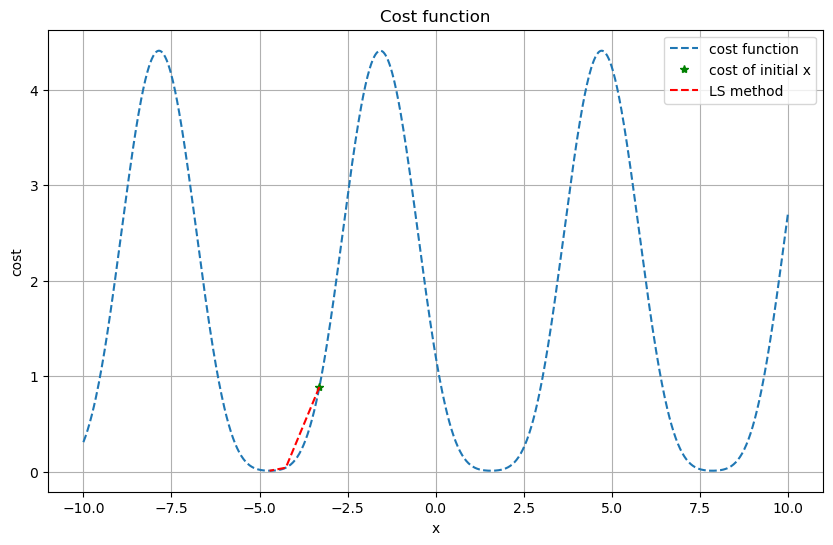

In [56]:
initial_point = -3.3
xx = Gauss_Newton_LS(initial_point, 1.1, 10, 5)

plt.figure(figsize=(10,6))
plt.plot(xs, cost_results, linestyle='--', label='cost function')
plt.plot(initial_point, J(initial_point), 'g*', label='cost of initial x')
plt.plot(xx, J(xx), 'r--', label='LS method')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('Cost function')
plt.show()